"Quero identificar padrões e tendências para melhorar nossas decisões de marketing e direcionar nossos investimentos"


In [ ]:
! pip install pandas


In [ ]:
! pip install openpyxl

In [10]:
import pandas as pd 

# Buscando cada sheet dísponível na planilha
df_clientes = pd.read_excel('marketing.xlsx', sheet_name='clientes')
df_campanhas= pd.read_excel('marketing.xlsx', sheet_name='campanhas')
df_vendas= pd.read_excel('marketing.xlsx', sheet_name='vendas')
df_produtos= pd.read_excel('marketing.xlsx', sheet_name='produtos')



Quais são os segmentos mais rentáveis com base nos dados ? (ex.: idade, localização).

In [48]:
# Juntando a sheet de clientes com vendas 
clientes_vendas = pd.merge(df_clientes, df_vendas, left_on='id _cliente', right_on='id_vendas', how='inner')

# agrupando rentabilidade por localização
rentabilidade_geografica = clientes_vendas.groupby('localizacao_venda')['valor_venda'].sum().reset_index()

rentabilidade_geografica

,localizacao_venda,valor_venda
0,Rio de Janeiro,450
1,São Paulo,500


In [ ]:
! pip install matplotlib

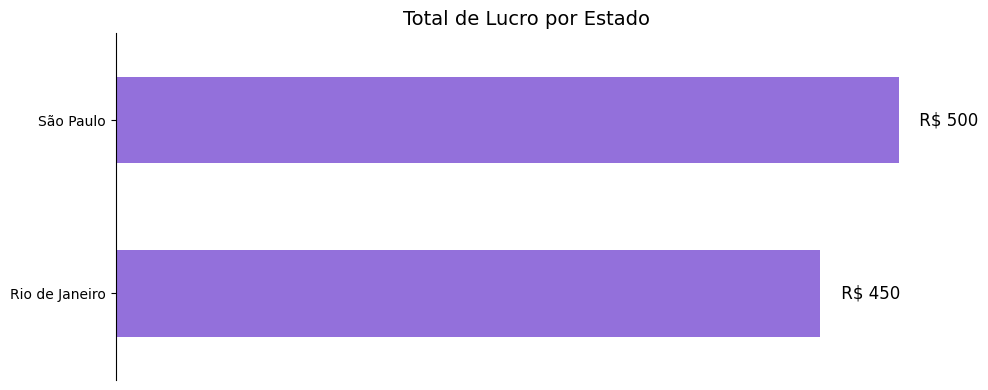

In [83]:
import matplotlib.pyplot as plt
rentabilidade_geografica = clientes_vendas.groupby('localizacao_venda')['valor_venda'].sum().reset_index()

# Colocando a coluna localizacao_venda como índice
rentabilidade_geografica.set_index('localizacao_venda', inplace=True)


# Criando o gráfico de barras horizontais sem bordas
ax = rentabilidade_geografica.plot(
    kind='barh', 
    color='mediumpurple', 
    legend=False, 
    figsize=(10, 4)
)

# Colocando o título
plt.title('Total de Lucro por Estado', fontsize=14)

# Colocando os valores direto na barra
for index, value in enumerate(rentabilidade_geografica['valor_venda']):
    plt.text(value + 10, index, f' R$ {value}', va='center', fontsize=12)  # Ajuste do deslocamento com `value + 10`


# Removendo o eixo X
ax.get_xaxis().set_visible(False)
# Removendo o eixo Y 
ax.set_ylabel('')


ax.spines['top'].set_visible(False)   # Remove a linha superior
ax.spines['right'].set_visible(False) # Remove a linha direita

ax.spines['bottom'].set_visible(False) # Remove a linha inferior


plt.tight_layout()
plt.show()

In [42]:
# Criando uma tupla com os valores monetários (Usar depois)

tupla_valores = tuple(rentabilidade_geografica['valor_venda'])

media_lucro = pd.Series(tupla_valores).median()
print(f'A média de lucro da empresa gira em torno de R$ {media_lucro}')

475.0
